<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4 and 5)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**


**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#### Load the csv file

In [2]:
# type your code here
df = pd.read_csv('emp_attrition.csv')
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
# Decision trees are immune to outliers

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here

df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include=np.number)

In [4]:
cat_enc = pd.get_dummies(df_cat.drop('Attrition',axis=1),drop_first=True)

In [5]:
cat_enc.shape

(1580, 19)

In [6]:
final_df = pd.concat([df_num,cat_enc,df[['Attrition']]],axis=1)

In [30]:
final_df['Attrition']=final_df['Attrition'].map({'Yes':1,'No':0})

In [7]:
final_df.shape

(1580, 31)

In [31]:
x = final_df[['EnvironmentSatisfaction','MonthlyIncome']]
y = final_df['Attrition']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [33]:
DT= DecisionTreeClassifier()
dt_esm = DT.fit(x_train,y_train)
dt_esm_pred  = dt_esm.predict(x_test)

In [34]:
accuracy_score(y_test,dt_esm_pred)

0.869198312236287

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
x = final_df.drop('Attrition',axis=1)
y = final_df['Attrition']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [37]:
DT= DecisionTreeClassifier()

In [38]:
dt_full = DT.fit(x_train,y_train)
dt_full_pred = dt_full.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,accuracy_score,roc_auc_score

In [40]:
print(classification_report(y_test,dt_full_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       265
           1       0.80      0.98      0.88       209

    accuracy                           0.88       474
   macro avg       0.89      0.89      0.88       474
weighted avg       0.90      0.88      0.88       474



In [41]:
pd.DataFrame({'Variables':x.columns,'Importance':dt_full.feature_importances_})

,Variables,Importance
0,Age,0.148161
1,DistanceFromHome,0.042602
2,EnvironmentSatisfaction,0.047071
3,JobInvolvement,0.032747
4,JobLevel,0.001831
5,JobSatisfaction,0.025253
6,MonthlyIncome,0.199435
7,NumCompaniesWorked,0.096472
8,PercentSalaryHike,0.038923
9,PerformanceRating,0.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here
roc_auc_score(y_test,dt_full_pred)

0.8918118624176221

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here

confusion_matrix(y_test,dt_full_pred)

array([[214,  51],
       [  5, 204]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
from sklearn import tree

In [50]:
DT = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5)

In [51]:
dt_5tn = DT.fit(x_train,y_train)

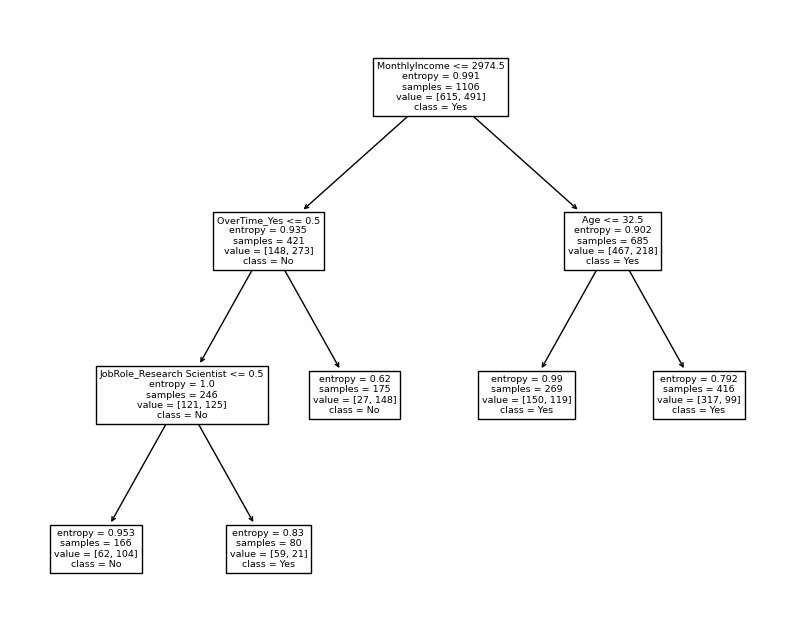

In [54]:
plt.figure(figsize=(10,8))
tree.plot_tree(dt_5tn,class_names=['Yes','No'],feature_names=x_train.columns)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=3)

In [58]:
cross_val_score(DT,x_train,y_train,cv=10).mean()

0.6564127764127764

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [59]:
# type your code here
params = [{'criterion':['entropy', 'gini'], 'max_depth':range(2,10), 'min_samples_split':range(2,10)}]

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
dt_grid = GridSearchCV(estimator=DT,param_grid=params,cv=2)

In [62]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              max_features=3),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [63]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here

DT_tuned = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=2)

In [68]:
cross_val_score(DT_tuned,x_train,y_train,cv=10,scoring='roc_auc').mean()

0.881496789302712

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# type your code here
import random as r

In [70]:
columns = list(x_train.columns)

In [81]:
### Model-1
random_features = r.choices(columns,k=20)
dt_r1 = DecisionTreeClassifier(random_state=10)
dt_r1 = dt_r1.fit(x_train[random_features],y_train)
y_pred_r1 = dt_r1.predict(x_test[random_features])

In [82]:
### Model-2
random_features = r.choices(columns,k=20)
dt_r2 = DecisionTreeClassifier(random_state=10)
dt_r2 = dt_r2.fit(x_train[random_features],y_train)
y_pred_r2 = dt_r2.predict(x_test[random_features])

In [83]:
### Model-3
random_features = r.choices(columns,k=20)
dt_r3 = DecisionTreeClassifier(random_state=10)
dt_r3 = dt_r3.fit(x_train[random_features],y_train)
y_pred_r3 = dt_r3.predict(x_test[random_features])

In [84]:
### Model-4
random_features = r.choices(columns,k=20)
dt_r4 = DecisionTreeClassifier(random_state=10)
dt_r4 = dt_r4.fit(x_train[random_features],y_train)
y_pred_r4 = dt_r4.predict(x_test[random_features])

In [85]:
### Model-5
random_features = r.choices(columns,k=20)
dt_r5 = DecisionTreeClassifier(random_state=10)
dt_r5 = dt_r5.fit(x_train[random_features],y_train)
y_pred_r5 = dt_r5.predict(x_test[random_features])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a new dataframe "model_predictions_df" by appending each prediction made in question 10. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# type your code here
mp = pd.DataFrame({'y_pred_1':y_pred_r1,
                   'y_pred_2':y_pred_r2,
                   'y_pred_3':y_pred_r3,
                   'y_pred_4':y_pred_r4,
                   'y_pred_5':y_pred_r5})

In [87]:
mp

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5
0,1,0,1,0,0
1,1,1,0,0,0
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
469,0,0,0,0,1
470,1,1,1,1,1
471,1,1,1,1,1
472,1,1,1,1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
votes = []
for i in range(mp.shape[0]):
    votes.append(mp.iloc[i].value_counts().index[0])

In [94]:
votes

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [95]:
# type your code here
mp['Voted_Result'] = mp.mode(axis=1)
mp.head(10)

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,Voted_Result
0,1,0,1,0,0,0
1,1,1,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1
6,0,1,1,0,0,0
7,1,1,1,1,1,1
8,0,0,0,0,0,0
9,1,1,1,1,1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# type your code here

roc_auc_score(y_test,votes)

0.9412386025097048